<a href="https://colab.research.google.com/github/EngineerLambda/Roman-Numeral/blob/master/Innomatics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os; cwd = os.getcwd()
cwd

'/content'

In [2]:
links = pd.read_csv(cwd + "/links.csv")
movies = pd.read_csv(cwd + "/movies.csv")
ratings = pd.read_csv(cwd + "/ratings.csv")
tags = pd.read_csv(cwd + "/tags.csv")

In [3]:
movies.shape

(9742, 3)

In [4]:
ratings.shape

(43084, 4)

In [5]:
unique_ids = ratings.userId.value_counts()
len(unique_ids)

288

In [6]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,9.649827e+08
1,1,3,4.0,9.649812e+08
2,1,6,4.0,9.649822e+08
3,1,47,5.0,9.649838e+08
4,1,50,5.0,9.649829e+08
...,...,...,...,...
43079,288,32587,4.5,1.130179e+09
43080,288,32598,3.5,1.145817e+09
43081,288,33004,3.5,1.135790e+09
43082,288,33164,2.5,1.138807e+09


In [7]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [8]:
id_rate_max = ratings.movieId.value_counts().idxmax()
print(id_rate_max)
movie_max_name = movies[movies.movieId == id_rate_max].title
movie_max_name

356


314    Forrest Gump (1994)
Name: title, dtype: object

In [9]:
tags

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


In [10]:
matrix_id = movies[movies.title == "Matrix, The (1999)"]["movieId"].values
print(matrix_id)
matrix_tags = tags[tags.movieId == matrix_id[0]]
matrix_tags

[2571]


,userId,movieId,tag,timestamp
815,424,2571,martial arts,1457842912
816,424,2571,sci-fi,1457842899
1646,474,2571,alternate universe,1137204991
2794,537,2571,philosophy,1424141098
2795,537,2571,post apocalyptic,1424141101


In [11]:
terminator_id = movies[movies.title == "Terminator 2: Judgment Day (1991)"]["movieId"].values[0]

term_avg = ratings[ratings.movieId == terminator_id]["rating"].mean()
term_avg

4.043269230769231

<Axes: ylabel='Frequency'>

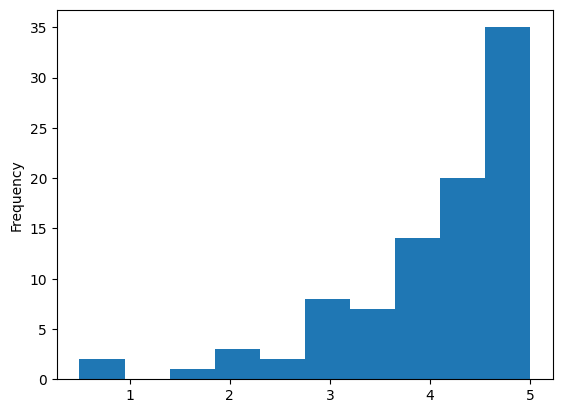

In [12]:
fight_id = movies[movies.title == "Fight Club (1999)"]["movieId"].values[0]

fight_ser = ratings[ratings.movieId == fight_id]["rating"]
fight_ser.plot(kind="hist")

In [13]:
rating_group = ratings.groupby("movieId")["rating"].agg(["mean", "count"]).reset_index()
rating_group

,movieId,mean,count
0,1,3.897196,107
1,2,3.366667,45
2,3,3.538462,26
3,4,2.600000,5
4,5,3.480000,25
...,...,...,...
6428,193579,3.500000,1
6429,193581,4.000000,1
6430,193583,3.500000,1
6431,193585,3.500000,1


In [14]:
merged_data = pd.merge(movies, rating_group, on="movieId", how="inner")
merged_data

,movieId,title,genres,mean,count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.897196,107
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.366667,45
2,3,Grumpier Old Men (1995),Comedy|Romance,3.538462,26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.600000,5
4,5,Father of the Bride Part II (1995),Comedy,3.480000,25
...,...,...,...,...,...
6428,193579,Jon Stewart Has Left the Building (2015),Documentary,3.500000,1
6429,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.000000,1
6430,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.500000,1
6431,193585,Flint (2017),Drama,3.500000,1


In [15]:
sub_data = merged_data[merged_data["count"]>50]
sub_data

,movieId,title,genres,mean,count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.897196,107
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.516949,59
30,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,4.084337,83
31,34,Babe (1995),Children|Drama,3.689655,58
34,39,Clueless (1995),Comedy|Romance,3.201923,52
...,...,...,...,...,...
3662,7438,Kill Bill: Vol. 2 (2004),Action|Drama|Thriller,3.815789,57
3881,8961,"Incredibles, The (2004)",Action|Adventure|Animation|Children|Comedy,3.767241,58
4152,33794,Batman Begins (2005),Action|Crime|IMAX,3.901961,51
4682,58559,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,4.350746,67


In [16]:
sub_data[sub_data["mean"] == sub_data["mean"].max()].sort_values('count', ascending=False)

,movieId,title,genres,mean,count
252,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.411565,147


In [17]:
sub_data.sort_values("count", ascending=False).head()

,movieId,title,genres,mean,count
286,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.104575,153
234,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.029801,151
252,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.411565,147
1682,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.152985,134
460,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.148855,131


In [18]:
scifi = sub_data[sub_data["genres"].apply(lambda x: "Sci-Fi" in x.split("|"))]
scifi.sort_values("count", ascending=False).head(3)

,movieId,title,genres,mean,count
1682,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.152985,134
205,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.256303,119
380,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.761468,109


In [19]:
links

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


In [21]:
scifi.sort_values("mean").tail(1)

,movieId,title,genres,mean,count
205,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.256303,119
